In [1]:
# imprescindible
import pandas as pd
import numpy as np

# to avoid some warnings messages
import warnings
# warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# to draw some graphs
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn and matplotlib default theme
sns.set_theme()
_sns_plotting_contex_ = sns.plotting_context()
sns.plotting_context('poster')

# set seaborn and matplotlib style to ...
# plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 14

# to use HTML codes within IPpython.display function
from IPython.display import HTML

import os


In [2]:

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to tune hiperparameters
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [3]:
# to keep only 4 digits
ROUND = lambda v : round(v, 4)


In [4]:
def set_figure(row, col, suptitle=None, y=0.98, fontsize='xx-large', fontweight='extra bold') :
    u''' Activate matplot figure setting size and super title
    '''
    
    fig = plt.figure(figsize=(row, col));
    if suptitle != None :
        fig.suptitle(suptitle, y=y, 
                     verticalalignment='center', fontsize=fontsize, fontweight=fontweight);
    return fig


### Data

In [5]:
def read_blogData_train() :
    u''' Reads and prepare data from blog feedback data train set
    
    '''

    data = pd.read_csv("./data/blogData_train.csv", header=None)
    data.drop_duplicates(inplace=True)
    data.reset_index(drop=True, inplace=True)
    
    header = pd.read_csv("./data/blogData_label.csv", header=None)
    header = list(header[0])
    
    if len(header) != data.shape[1] :
        raise Exception('Los encabezados y la cantidad de características NO COINCIDE !!!')

    data.columns = header
    
    return data


In [6]:
# to_classes = lambda v : 0 if v < 30 else (1 if v < 90 else (2 if v < 150 else (3 if v < 210 else 4)))
# to_classes = lambda v : 0 if v < 30 else (1 if v < 90 else 2)
to_classes = lambda v : 0 if v < 30 else 1

---

---


In [7]:

# def evaluate_classification_model() :
#     u'''
#     '''
if True :
# ---    
    class Eval_Estimator :
        u'''
        '''

        def __init__(self, name, estimator, params=None) :
            self.name = name
            self.estimator = estimator
            self.params = params

            return        
# ---
    data_raw = read_blogData_train()
    # test_raw = blogData_test_read()

    X_train = data_raw.iloc[:,0:280]
    y_train = data_raw.iloc[:,-1].copy()
    y_train = y_train.apply(to_classes)

    # X_test = test_raw.iloc[:,0:280]
    # y_test = test_raw.iloc[:,-1].copy()

    # X_train = X_train.iloc[:, 0:62].copy()
    # X_test = X_test.iloc[:, 0:62].copy()

    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    # X_test = scaler.transform(X_test)
# ---
    model = Eval_Estimator(
        name='XGBoost Classifier', 
        estimator=xgb.XGBClassifier(), 
        params={
            'eval_metric' : 'auc', # 
            'gamma' : 0, # (min_split_loss) minimum loss reduction
            'learning_rate' : 0.0001, # (eta) step size shrinkage
            'max_delta_step' : 1e6, # extremely imbalanced
            'max_depth' : 20, # maximum depth of tree
            'n_estimators' : 500, 
            'n_jobs' : -1, # use all processors
            'objective' : 'binary:logistic', # for binary classification 
            'random_state' : 127, 
            'verbosity' : 0, 
        }
    )
# ---
    model.estimator.set_params(**model.params)
    print('Entrenando modelo', model.name, '...')
    print(model.estimator.get_params())
    model.estimator.fit(X_train, y_train)
# ---
    class Eval_TestCase :
        u'''
        '''
        def __init__(self, case, data) :
            self.case = case
            self.data = data
            self.y_test = None
            self.y_pred = None
            return    
# ---
    filepath = './data/test/'
    filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

    caselist = []
    for filename in filelist :
        temp_raw = pd.read_csv(filename, header=None)
        temp_raw.drop_duplicates(inplace=True)
        
        pos = filename.index('2012')
        caselist.append( Eval_TestCase(filename[pos: pos+10], temp_raw) )
# ---
    results = pd.DataFrame(columns=['case', 'count', 'ROC AUC', 'y_test', 'y_pred'])

    for e in caselist :
        X = e.data.iloc[:,0:280]
        y = e.data.iloc[:,-1]
        y = y.apply(to_classes)
        X = scaler.transform(X)
        p = model.estimator.predict(X)
        
        e.y_test = y
        e.y_pred = p
        
        try :
            roc_auc = ROUND(roc_auc_score(y, p))
        except :
            rec_auc = -1

        results = results.append(
            pd.Series(
                data=[e.case, 
                      y.shape[0], 
                      roc_auc, 
                      y, p 
                     ], 
                index=results.columns), 
            ignore_index=True
        )
        
    # return results
# ---    


# comment to hide evaluate of regression model
# results = evaluate_classification_model()
display(results[['case', 'count', 'ROC AUC']].sample(5))
display(results[['ROC AUC']].describe().transpose())

Entrenando modelo XGBoost Classifier ...
{'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'enable_categorical': False, 'gamma': 0, 'gpu_id': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.0001, 'max_delta_step': 1000000.0, 'max_depth': 20, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 500, 'n_jobs': -1, 'num_parallel_tree': None, 'predictor': None, 'random_state': 127, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': 0, 'eval_metric': 'auc'}


,case,count,ROC AUC
42,2012.03.14,117,0.9912
24,2012.02.25,141,0.8000
51,2012.03.23,127,0.4880
39,2012.03.11,101,0.7000
11,2012.02.12,97,1.0000


,count,mean,std,min,25%,50%,75%,max
ROC AUC,60.0,0.755022,0.152464,0.488,0.6647,0.7462,0.842525,1.0


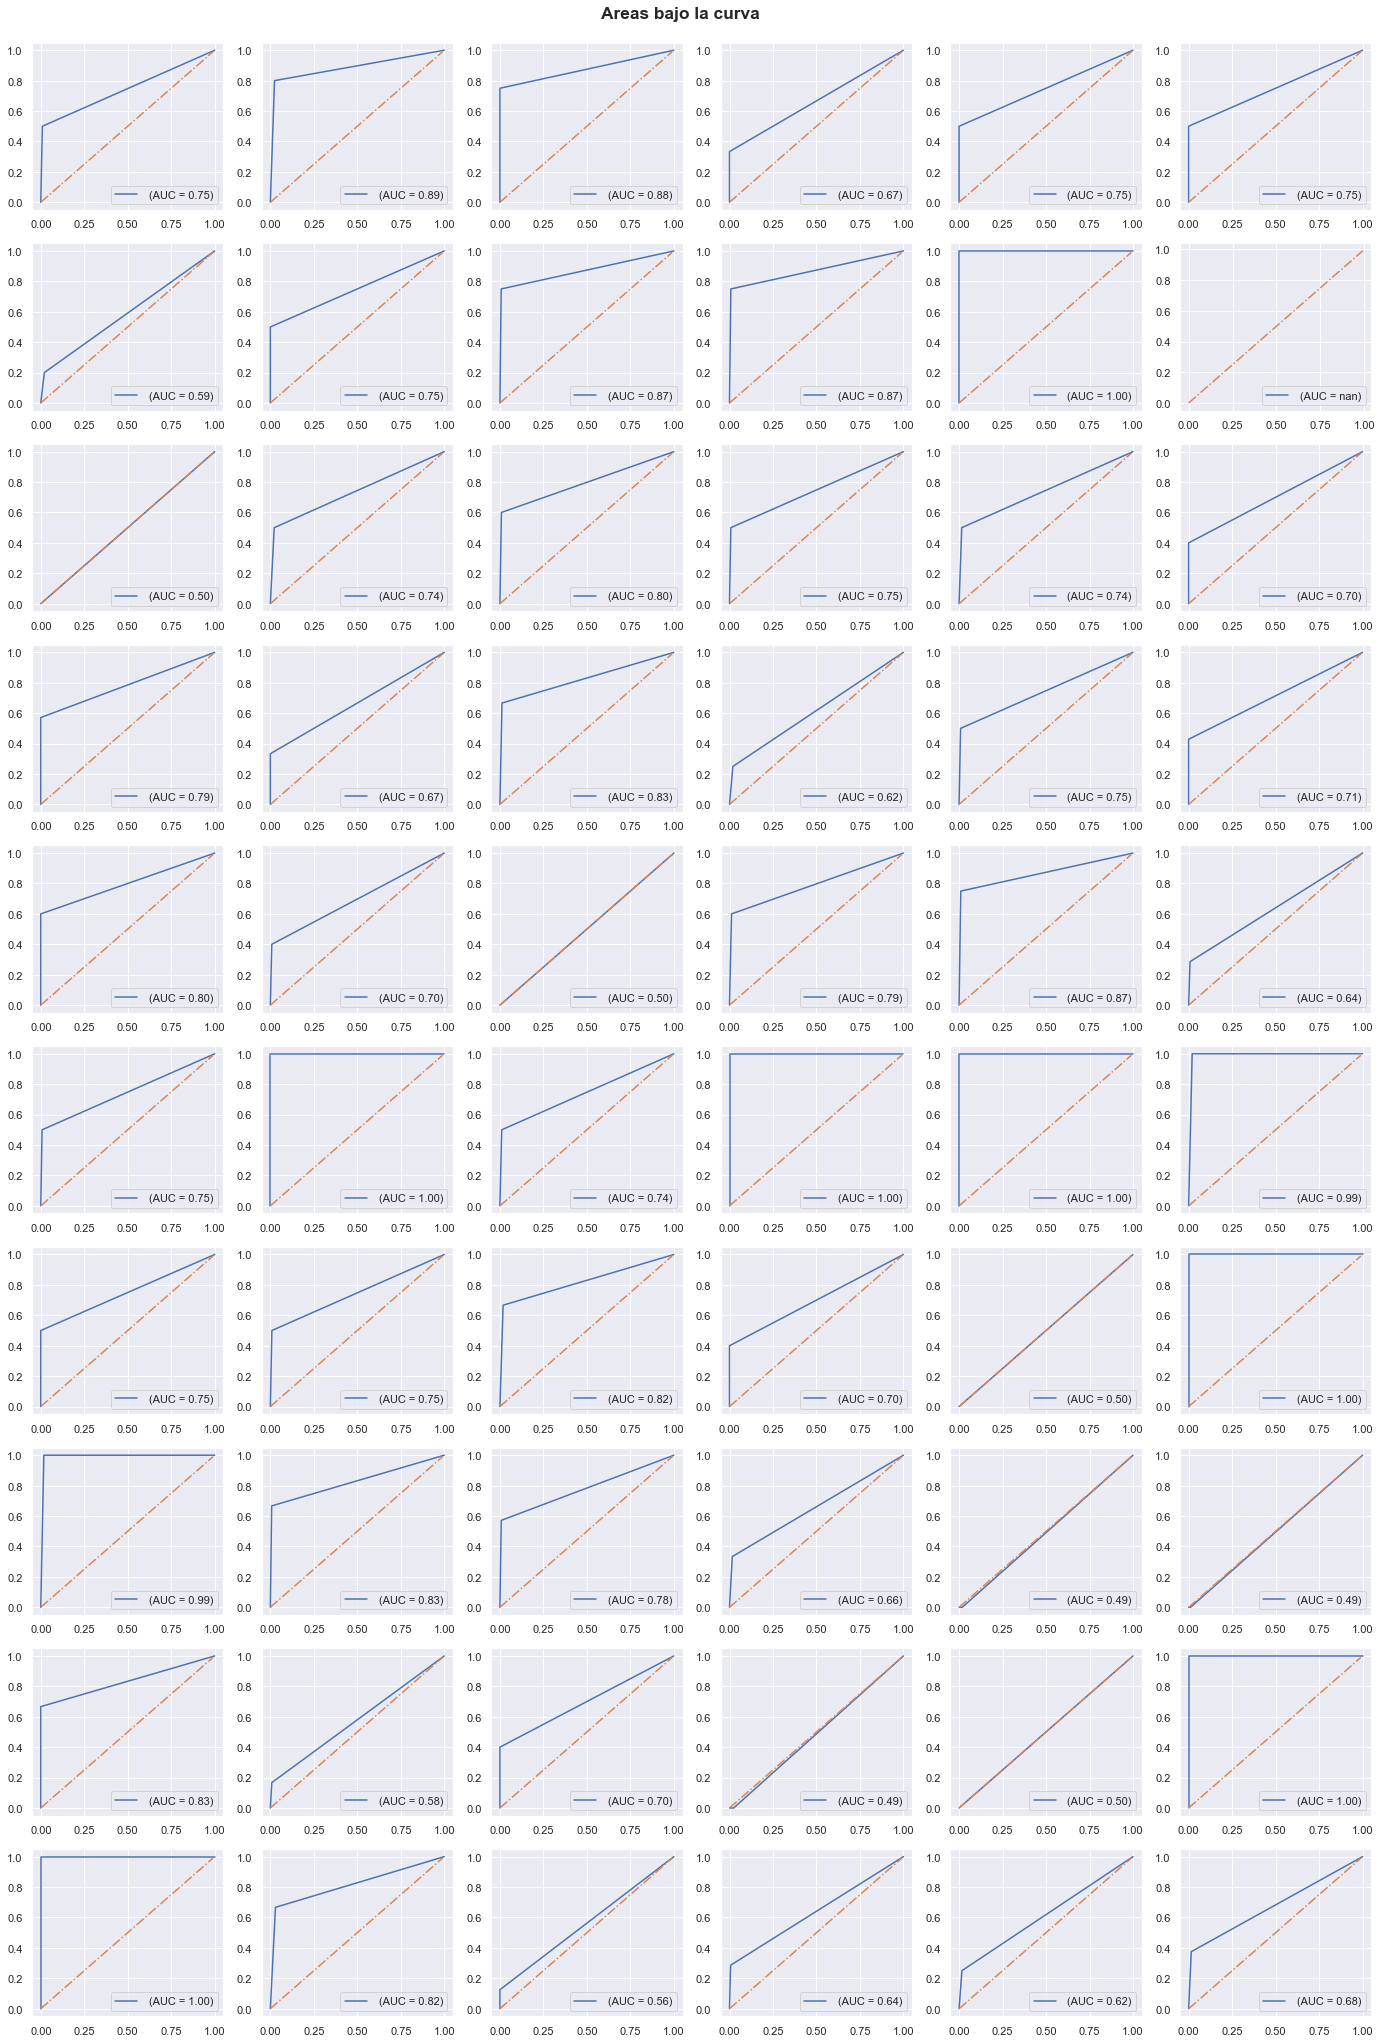

In [8]:
def show_roc_curves(results) :
    
    fig = set_figure(row=24, col=40, suptitle='Areas bajo la curva', y=0.89, fontsize='x-large')
    cols = 6
    rows = (results.shape[0] // cols) + 1

    for i in range(results.shape[0]) :
        ax = plt.subplot(rows, cols, i+1)
        y = results.iloc[i]['y_test']
        p = results.iloc[i]['y_pred']

        RocCurveDisplay.from_predictions(y_true=y, y_pred=p, name='', ax=ax)
        plt.plot(np.arange(0, 1, step=0.01), np.arange(0, 1, step=0.01), linestyle='-.' )
        plt.xlabel('')
        plt.ylabel('')
    plt.show()
    return

show_roc_curves(results)

Hay 53 Casos con ROC AUC mayor a 0.5


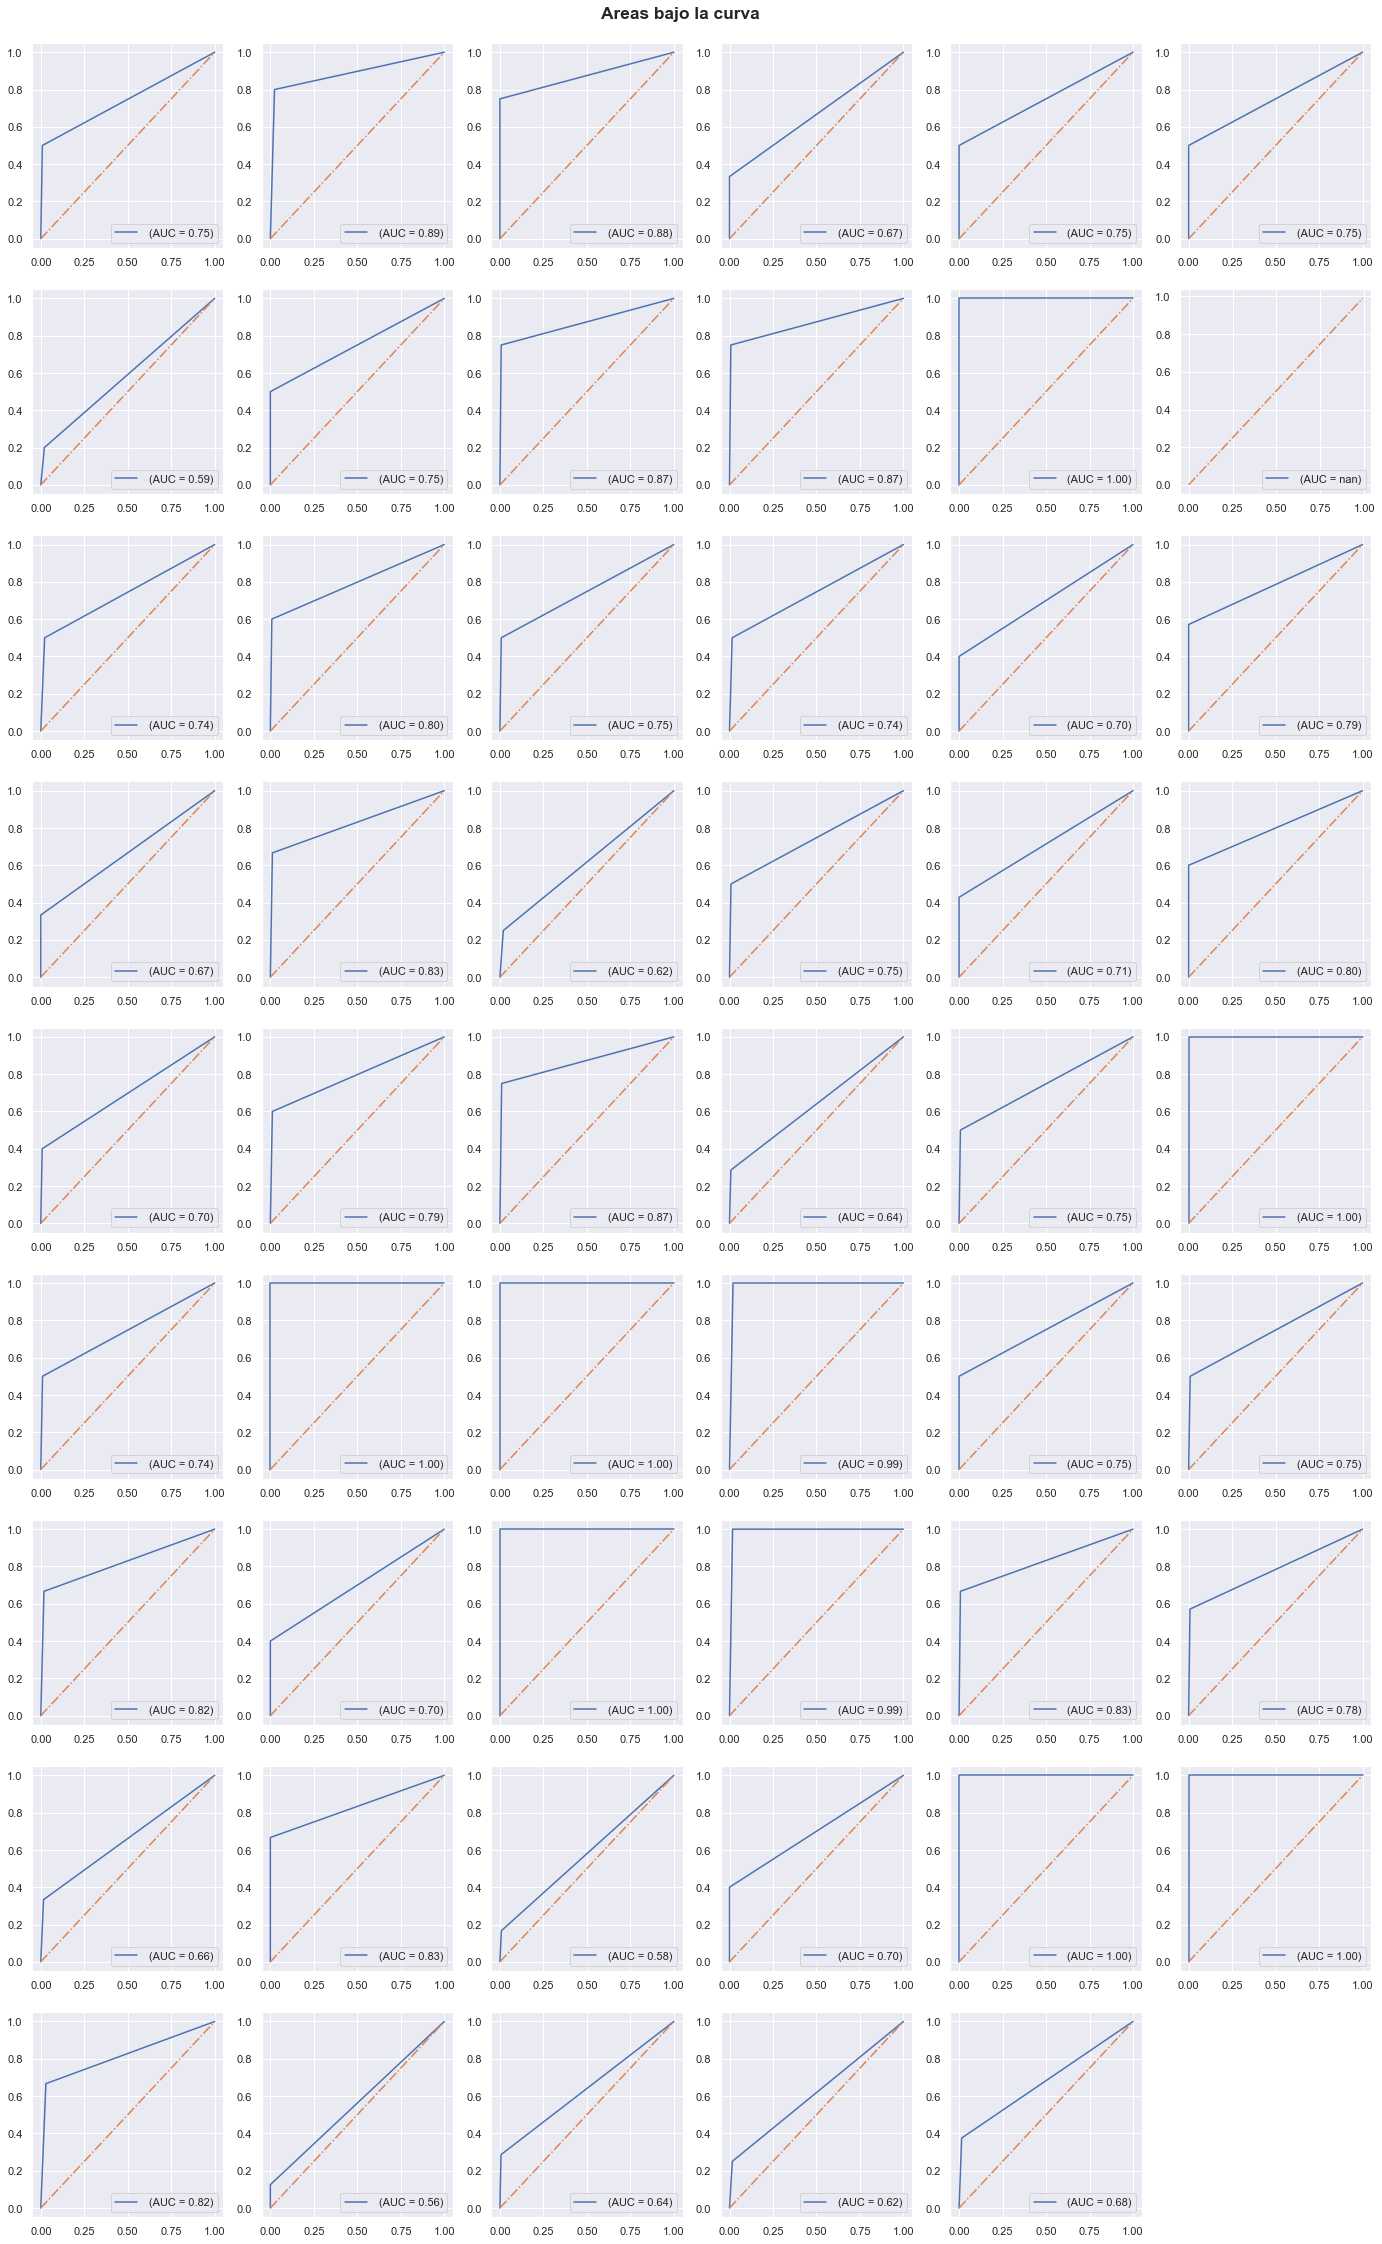

In [24]:
roc_auc_limit = 0.5
mask = results['ROC AUC'] > roc_auc_limit
print('Hay', results[mask].shape[0], 'Casos con ROC AUC mayor a', roc_auc_limit)
show_roc_curves(results[mask])

Hay  7 Casos con ROC AUC menor o igual a 0.5


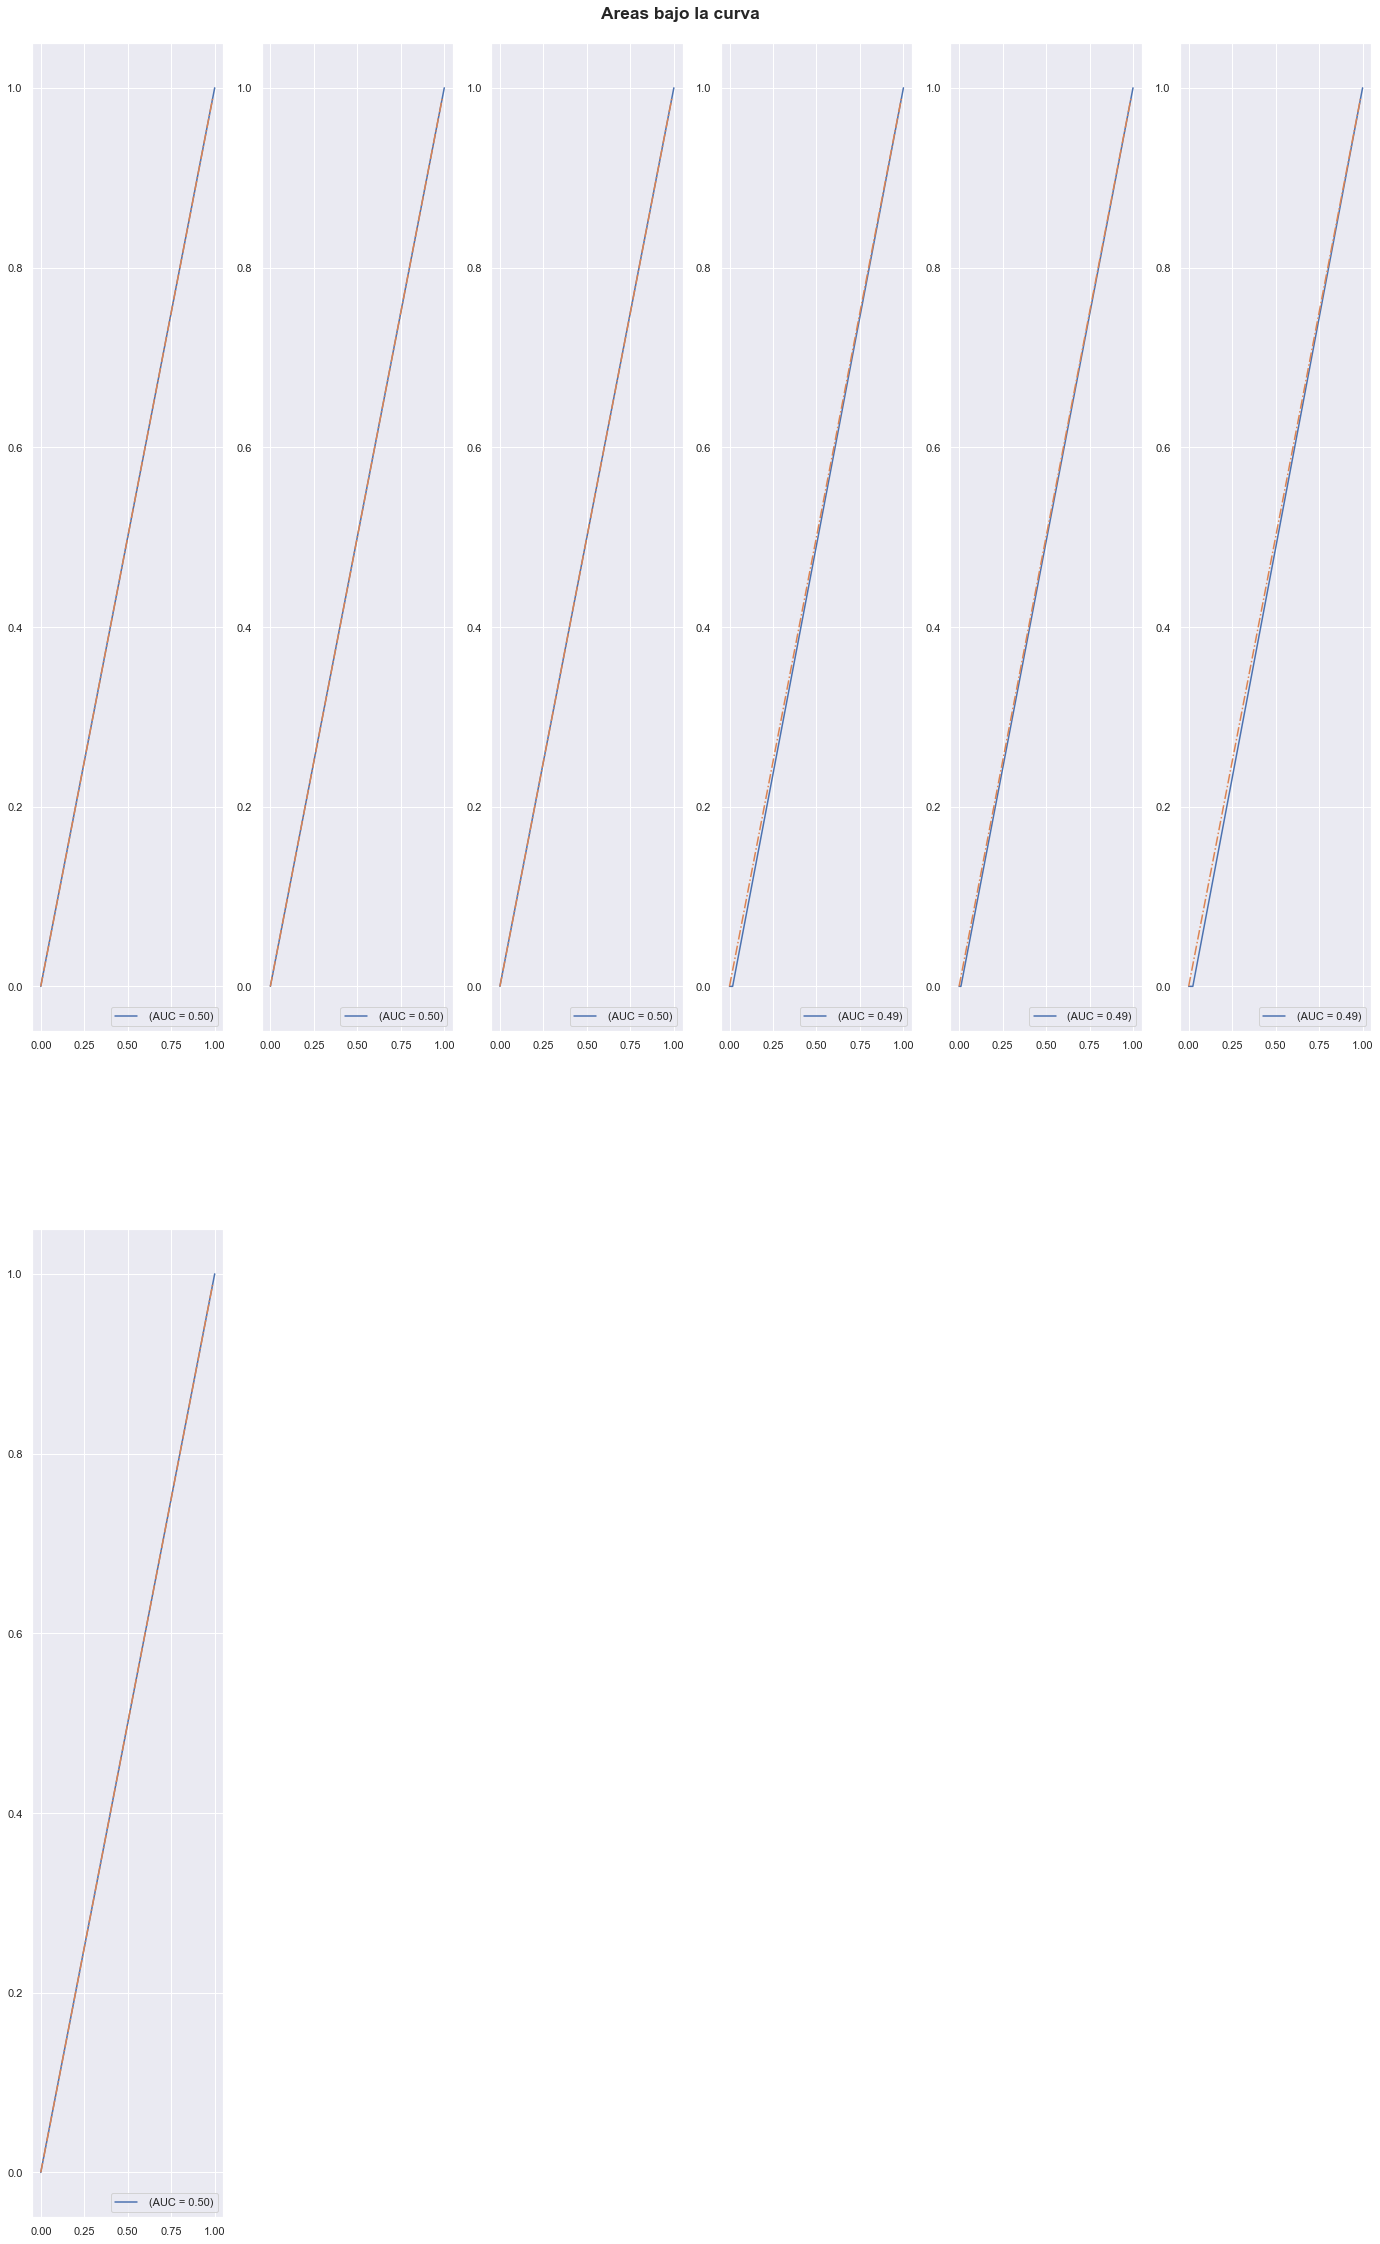

In [25]:
roc_auc_limit = 0.5
mask = results['ROC AUC'] <= roc_auc_limit
print('Hay ', results[mask].shape[0], 'Casos con ROC AUC menor o igual a', roc_auc_limit)
show_roc_curves(results[mask])

In [10]:
# fig = set_figure(row=16, col=16, suptitle='Areas bajo la curva', y=0.89, fontsize='x-large')

# cols = 1
# rows = (len(caselist) // cols) + 1
# ax = plt.subplot(1, cols, 1)

# for i, e in enumerate(caselist[:30]) :
#     # ax = plt.subplot(rows, cols, i+1)
#     y = e.y_test
#     p = e.y_pred
#     RocCurveDisplay.from_predictions(y_true=y, y_pred=p, name=None, ax=ax)
#     plt.xlabel('')
#     plt.ylabel('')
    
# plt.show()